In [1]:
#%pylab inline
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from matplotlib.patches import Circle


from collections import namedtuple as nt
mode_params=nt("mode_params", "a0 m p Mp w0")

from scipy.special import hermite, genlaguerre


def LG_mode(mode_params, tau, r, phi, z):
    a0=mode_params.a0
    m=mode_params.m  # mode number x
    p=mode_params.p  # mode number y
    Mp=mode_params.Mp 
        
    w0=mode_params.w0
    Lpm=genlaguerre(p,np.abs(m))
    
    ZR = Mp*w0**2/2
    
    w = w0*np.sqrt(1+z**2/ZR**2)
    chi = np.arctan(z/ZR)
    
    toret = 1/np.sqrt(w)*(r*np.sqrt(2)/w)**np.abs(m)*np.exp(-r**2/w**2)*Lpm(2*r**2/w**2)
    
    toret = toret*np.exp(-1j*r**2*z/2/(ZR**2+z**2))
    
    toret = toret*np.exp(1j*m*phi) * np.exp(-z**2/2/tau**2)*np.exp(1j*Mp*z)
    
    toret = a0*toret*np.exp(-1j*(2*p+np.abs(m)+1)*chi)
    
    #toret = toret*exp(-)
    
    
    
    #toret = toret + conjugate(toret)
    return toret

In [40]:
# 3d Laguerre-Gaussian



mode_1 = mode_params(1., 0, 0, 1., 3.**2*np.pi)
mode_2 = mode_params(0., 2, 0, 1., 3.**2*np.pi)

xmin=-10
xmax=10
ymin=-10
ymax=10
zmin=-15
zmax=15

nofxs = 60
nofys = 60
nofzs = 600

xx = np.linspace(xmin*2*np.pi, xmax*2*np.pi, nofxs)
yy = np.linspace(ymin*2*np.pi, ymax*2*np.pi, nofys)

#rho = linspace(0, )
zz = np.linspace(zmin*2*np.pi, zmax*2*np.pi, nofzs)

#x,y,z=meshgrid(xx,yy,zz)
x,y,z = np.meshgrid(xx,yy,zz, indexing='xy')

r = np.sqrt(x**2+y**2)

xiy = x + 1j*y
phi = np.angle(xiy)

tau = 4*2*np.pi
delay = -tau

field_x = np.abs(LG_mode(mode_1, tau, r, phi, z-delay/2))*\
        np.cos(np.angle(LG_mode(mode_1, tau, r, phi, z-delay/2)))

field_x = field_x + np.abs(LG_mode(mode_2, tau, r, phi, z+delay/2))*\
        np.cos(np.angle(LG_mode(mode_2, tau, r, phi, z+delay/2)))

envelope1 = np.abs(LG_mode(mode_1, tau, r, phi, z-delay/2))
envelope2 = np.abs(LG_mode(mode_2, tau, r, phi, z+delay/2))

# now i have field_x numerically representing incoming
# how to add reflection


# for every x,y:
# find a (envelope)
# refl_field = LG_mode_envelope * cos(...z+zmirror)
# interp
# output: interped array of fields including retarded time

zmirror = envelope1/np.sqrt(1+envelope1 ** 2) * np.cos(np.angle(LG_mode(mode_1, tau, r, phi, z-delay/2)))**2
refl_field = envelope1 * np.cos(np.angle(LG_mode(mode_1, tau, r, phi, z-delay/2+zmirror)))

zd = z-zmirror
#refl_field_interp = np.interp(z, zd, refl_field)

plt.plot(zz/2/np.pi, field_x[30,30,:])

from pyevtk.hl import pointsToVTK
from pyevtk.hl import gridToVTK

gridToVTK("./test_potential", x/np.amax(x), y/np.amax(y), z/np.amax(z), pointData = {"field_x" : field_x})

filename='./test_field'
gridToVTK(filename, x/np.amax(x), y/np.amax(y), z/np.amax(z), pointData = {"field_x" : field_x})

# Now load test_potential.vts in Paraview

ValueError: object too deep for desired array

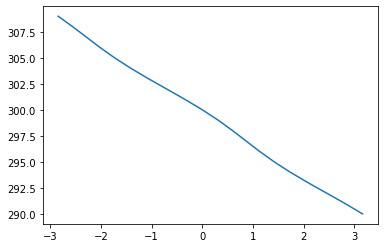

In [39]:
plt.plot((zmirror - z)[30,30,290:310], range(290,310))

In [45]:
zd.shape

(60, 60, 600)

In [11]:
filt = np.fft.fft(field_x, axis=2)
freq = np.fft.fftfreq(len(field_x[1,1,:]), d=zz[1]-zz[0])


filt_func = np.exp(-(freq*2*np.pi-3.0)**100/(0.5)**100)
filt_func = filt_func+np.exp(-(freq*2*np.pi+3.0)**100/(0.5)**100)

filt=filt*filt_func

refl_filt = np.fft.ifft(filt, axis=2)

(-10, 10)

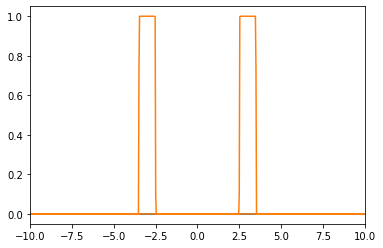

In [13]:
plt.plot(freq*2*np.pi, np.abs(filt[40,40,:]))

plt.plot(freq*2*np.pi, filt_func)
plt.xlim(-10,10)

In [ ]:
from ipywidgets import interact

In [ ]:
@interact(n=(0,nofzs-1,2))
def Plotter(n=0):
#    imshow(real(refl_filt[:,:,n]))
    imshow(field_x[:,:,n])
    #clim(0,0.1)
    tosave = '%03d_field.png' % n
    savefig(tosave, dpi=100)

In [ ]:
field_x_fft=fft.fft(field_x)

field_x_fft.shape
figure()
plot(abs(field_x_fft[40,40,:]))
xlim(0,25)

figure()
subplot(121)
title('Absolute value')
imshow(abs(field_x_fft[:,:,10]))

subplot(122)
title('Angle')
imshow(angle(field_x_fft[:,:,10]))

In [ ]:
# 3d Laguerre-Gaussian

mode_1 = mode_params(1.  ,    1 , 4, 1., 3.*2*pi)
mode_2 = mode_params(0.01,    10, 0, 1., 3.*2*pi)
mode_3 = mode_params(0.2 ,    5 , 0, 1., 3.*2*pi)
mode_4 = mode_params(0.  ,    1 , 0, 1., 3.*2*pi)

xmin=-10
xmax=20
ymin=-10
ymax=10
zmin=-5
zmax=5

nofxs = 200
nofys = 100
nofzs = 200

xx=linspace(xmin*2*pi, xmax*2*pi, nofxs)
yy=linspace(ymin*2*pi, ymax*2*pi, nofys)

rho = linspace(0, xmax*2*pi, nofxs)
phi = linspace(0, 2*pi, nofys)
zz=linspace(zmin*2*pi, zmax*2*pi, nofzs)

rho,phi,z=meshgrid(rho,phi,zz, indexing='xy')

#x,y,z=meshgrid(xx,yy,zz)
#x,y,z=meshgrid(xx,yy,zz, indexing='xy')

#r=sqrt(x**2+y**2)

#xiy = x+1j*y
#phi=angle(xiy)

field_x = abs(LG_mode(mode_1, 10, rho, phi, z))*cos(angle(LG_mode(mode_1, 10, rho, phi, z)))
field_x = field_x + abs(LG_mode(mode_2, 10, rho, phi, z))*cos(angle(LG_mode(mode_2, 10, rho, phi, z)))
field_x = field_x + abs(LG_mode(mode_3, 10, rho, phi, z))*cos(angle(LG_mode(mode_3, 10, rho, phi, z)))
field_x = field_x + abs(LG_mode(mode_4, 10, rho, phi, z))*cos(angle(LG_mode(mode_4, 10, rho, phi, z)))


plot(field_x[40,40,:])


#from pyevtk.hl import pointsToVTK
#from pyevtk.hl import gridToVTK

#gridToVTK("./test_potential", x/amax(x), y/amax(y), z/amax(z), pointData = {"field_x" : field_x})

#filename='./test_field'
#gridToVTK(filename, x/amax(x), y/amax(y), z/amax(z), pointData = {"field_x" : field_x})

# Now load test_potential.vts in Paraview

In [ ]:
@interact(n=(0,200))
def Plotter(n=0):
    
    figure()
    fig,ax = plt.subplots(subplot_kw=dict(projection='polar'))
    fig3=ax.pcolormesh(phi[:,:,n],rho[:,:,n], abs(field_x[:,:,n]))


In [ ]:
field_spec=fft.fft(field_x, axis=2)
w=fft.fftfreq(shape(field_x)[2], d=zz[1]-zz[0])*2*pi
plot(w, abs(field_spec[50,50,:]))
dw=w[1]-w[0]

In [ ]:
@interact(n=(0,200))
def Plotter(n=10):
    
    
    figure(figsize=(15,10))
    #fig,ax = plt.subplots(subplot_kw=dict(projection='polar'))
    subplot(121, projection='polar')
    pcolormesh(phi[:,:,n],rho[:,:,n], abs(field_spec[:,:,n]))
    title(str(n*dw))
    
    #fig,ax = plt.subplots(subplot_kw=dict(projection='polar'))
    subplot(122, projection='polar')
    pcolormesh(phi[:,:,n],rho[:,:,n], angle(field_spec[:,:,n]))
    #title(str(n*dw))

In [ ]:
to_phi_fft = field_spec[:,:,10]
#to_phi_fft.shape
phispec = fft.fft(to_phi_fft, axis=0)
rhospec = fft.fft(to_phi_fft, axis=1)
figure()
semilogy(abs(phispec[:, 40]), '*-')
xlim(0,20)

figure()
plot(abs(rhospec[50, :]), '.-')
xlim(0,40)
#subplot(111, projection='polar')
#pcolormesh(phi[:,:,10], rho[:,:,10], abs(phispec))

#imshow(log10(abs(phispec)), origin='lower', aspect='auto')

In [ ]:
mode_1=mode_params(1, 3, 0, 2., 3.**2*pi)

xmin=-20
xmax=20
ymin=-20
ymax=20

nofxs = 1000
nofys = 1000

xx=linspace(xmin*2*pi, xmax*2*pi, nofxs)
print(len(xx/2/pi))
yy=linspace(ymin*2*pi, ymax*2*pi, nofys)

x,y=meshgrid(xx,yy)

r=sqrt(x**2+y**2)

xiy = x+1j*y
phi=angle(xiy)

field_x = real(LG_mode(mode_1, 10, r, phi, -100))
field_y = imag(LG_mode(mode_1, 10, r, phi, -100))

print(r.shape)

figure(figsize=(8,8))
fig1 = imshow(angle(field_y), origin='lower', extent=[xmin, xmax, ymin, ymax])
plt.colorbar(fig1,fraction=0.02, pad=0.04)
#c1=Circle((0,0), radius=5, color='w', fill=False)
#plot(0,0, 'wo')
#ax=gca()
#ax.add_artist(c1)

#figure()
#imshow(field.imag)

figure(figsize=(8,8))
imshow(field_x,origin='lower')
colorbar()

In [ ]:
phase = angle(field)
print(shape(phase))


rhorho = np.sqrt((x)**2 + (y)**2)
phiphi = -angle((y)*1j+(xx))
print(shape(rhorho))

figure()
plt.scatter(rhorho.flatten(),phiphi.flatten(),c=phase.flatten(),lw=0,s=3)
#plt.scatter(rho,phi,c=Ex_3D_t,vmin=-2,vmax=2.0,lw=0,s=2)

xlim(0,120)
xlabel('rho')
ylabel('phi')

Rho = linspace(0,120,nofxs)
Phi = linspace(-pi,pi,nofys)
[RhoRho,PhiPhi]=meshgrid(Rho,Phi)

rho_1D = reshape(rhorho,(nofxs * nofys))
phi_1D = reshape(phiphi,(nofxs * nofys))
points = zeros((nofxs * nofys,2))
values = zeros((nofxs * nofys,1))
points[:,0] = rho_1D
points[:,1] = phi_1D
phase_1D = reshape(phase,(nofxs * nofys))

from scipy.interpolate import griddata

values = phase_1D
grid_z = griddata(points, values, (RhoRho, PhiPhi), method='nearest')

figure()
plt.imshow(grid_z,origin='lower',aspect='auto',vmin=-pi,vmax=pi)
colorbar()
#plt.scatter(RhoRho.flatten(),PhiPhi.flatten(),c=grid_z.flatten(),lw=0,s=3)
#xlim(0,120)
#ylim(-pi,pi)

figure()
plot(grid_z[:,50])



In [ ]:
theta=30.0*pi/180
pulse = exp(-(x**2)/2/30**2)*exp(-(y**2)/2/30**2)*sin(0.0-x*cos(theta)-y*sin(theta))

#xprime = x*cos(theta)+y*sin(theta)
#yprime = -x*sin(theta)+y*cos(theta)



#pulse = exp(-(xprime**2)/2/50**2)*sin(0.0-xprime-yprime)
#pulse = pulse * exp(-(yprime**2)/2/50**2)



imshow(pulse)

In [ ]:
sp=fft.fft2(pulse)
kxx=fft.fftfreq(len(pulse), d=xx[1]-xx[0])
kyy=fft.fftfreq(len(pulse), d=yy[1]-yy[0])
kx,ky=meshgrid(kxx,kyy)

In [ ]:
pcolormesh(kx*2*pi,ky*2*pi, log(abs(sp)))
colorbar()
vlines(0,-15,15)
hlines(0, -15, 15)
xlim(-2,2)
ylim(-2,2)

In [ ]:
complex_k = kx+1j*ky

pcolormesh(2*pi*sqrt(kx**2+ky**2), angle(complex_k)*180/pi, log(abs(sp)))

xlim(0,2)

ylim(-60,60)

xlabel(r'$\omega$', fontsize=20)
ylabel(r'$\theta$', fontsize=20)

In [ ]:
mode_1=mode_params(0.4, 10, 0, 1., 0., 3.**2*pi)

xmin=-20
xmax=20
ymin=-20
ymax=20
zmin=-10
zmax=10


xx=linspace(xmin*2*pi, xmax*2*pi, 300)
yy=linspace(ymin*2*pi, ymax*2*pi, 300)
zz=linspace(zmin*2*pi, zmax*2*pi, 100)

x,y,z=meshgrid(xx,yy, zz)

r=sqrt(x**2+y**2)

xiy = x+1j*y
phi=angle(xiy)

field = LG_mode(mode_1, 0, r, phi, z)

print(r.shape)

figure(figsize=(8,8))
imshow(imag(field), origin='lower', extent=[xmin, xmax, ymin, ymax])
c1=Circle((0,0), radius=5, color='w', fill=False)
plot(0,0, 'wo')
ax=gca()
ax.add_artist(c1)

#figure()
#imshow(field.imag)

figure(figsize=(8,8))
imshow(abs(field)**2)

In [ ]:
imshow(real(field[:,:,45]), aspect='auto')
colorbar()

In [ ]:
ddlx = linspace(0,20,200)
ddly = linspace(0,30,300)

ddlxx,ddlyy =meshgrid(ddlx,ddly)

ddlvalue = ddlxx**2+ddlyy**2

pcolormesh(ddlxx,ddlyy,ddlvalue,cmap='jet')
colorbar()


In [ ]:
engMax[n]= sqrt(mass*mass+momMax[n]*momMax[n])-mass;
